# Desafio Cientista de Dados - Análise de Filmes para PProductions

**Objetivo:** Esse notebook apresenta uma análise detalhada sobre um banco de dados cinematográfico do IMDB. O objetivo é extrair insights para orientar o estúdio PProductions sobre qual tipo de filme desenvolver, com foco em maximizar o sucesso de faturamento e de crítica.

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle 

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print('Ambiente configurado e bibliotecas importadas.')

Ambiente configurado e bibliotecas importadas.


In [ ]:

caminho_arquivo = r'C:\Desafio\desafio_indicium_filmes\data\desafio_indicium_imdb.csv'
df = pd.read_csv(caminho_arquivo)
df.head()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


#### Diagnóstico Inicial dos Dados

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


Limpeza e pré-processamento de dados


In [ ]:
if 'Unnamed: 0' in df.columns:
    df.drop('Unnamed: 0', axis=1, inplace=True)

df['Runtime'] = df['Runtime'].astype(str).str.replace(' min', '').astype(int)


df['Gross'] = df['Gross'].astype(str).str.replace(',', '', regex=False)
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')

df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')


df['Certificate'].fillna('Not Rated', inplace=True)

median_metascore = df['Meta_score'].median()
df['Meta_score'].fillna(median_metascore, inplace=True)

median_gross = df['Gross'].median()
df['Gross'].fillna(median_gross, inplace=True)

median_year = df['Released_Year'].median()
df['Released_Year'].fillna(median_year, inplace=True)


df['Released_Year'] = df['Released_Year'].astype(int)

print("Limpeza concluída. Verificação dos tipos de dados e valores nulos:")
df.info()
median_year = df['Released_Year'].median()
df['Released_Year'].fillna(median_year, inplace=True)

df['Released_Year'] = df['Released_Year'].astype(int)

df.info()


Limpeza concluída. Verificação dos tipos de dados e valores nulos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    int64  
 2   Certificate    999 non-null    object 
 3   Runtime        999 non-null    int64  
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     999 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          999 non-null    float64
dtypes: float64(3), int64(3), object(9)
memory usage: 117.2+ KB
<class 'pandas.c

C:\Users\lucax\AppData\Local\Temp\ipykernel_3956\3441508364.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Certificate'].fillna('Not Rated', inplace=True)
C:\Users\lucax\AppData\Local\Temp\ipykernel_3956\3441508364.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

Análise Exploratória de Dados (EDA)

##### 2.1- Qual filme você recomendaria para uma pessoa que você não conhece?

In [ ]:
recomendacao = df.sort_values(by=['IMDB_Rating', 'No_of_Votes'], ascending=False).head(1)

print("Filme recomendado para uma pessoa desconhecida:")

print(recomendacao[['Series_Title', 'Genre', 'IMDB_Rating', 'No_of_Votes']].to_markdown(index=False))

Filme recomendado para uma pessoa desconhecida:
| Series_Title   | Genre        |   IMDB_Rating |   No_of_Votes |
|:---------------|:-------------|--------------:|--------------:|
| The Godfather  | Crime, Drama |           9.2 |       1620367 |



##### 2.2- Quais São os principais fatores que estão relacionados com alta expectativa de faturamento?

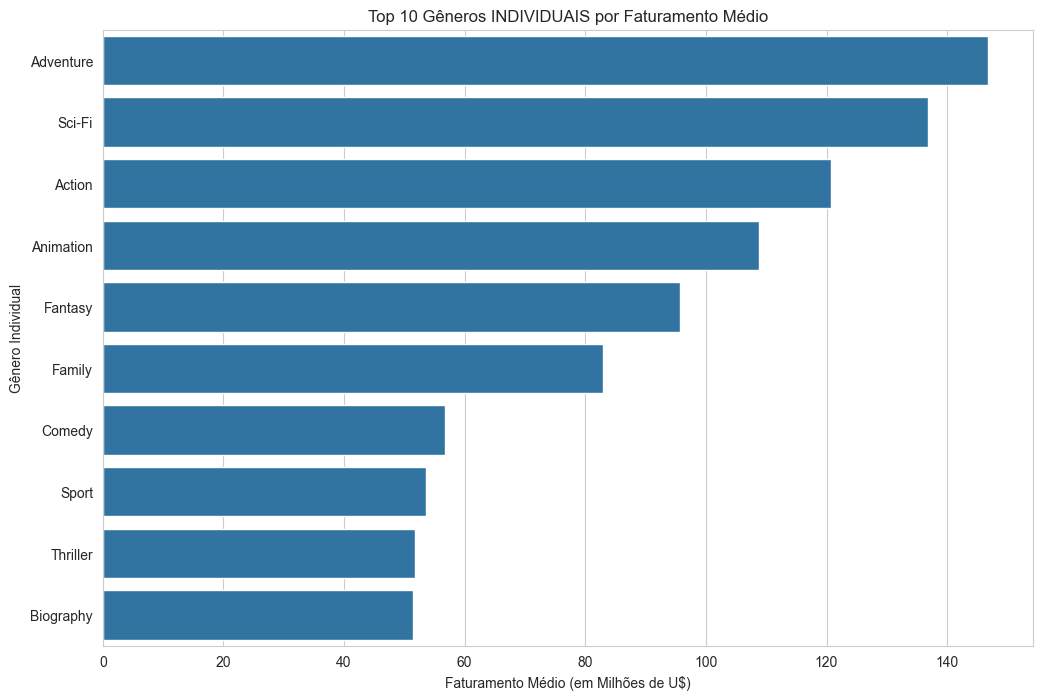

In [ ]:
# --- Análise de Gênero ---

df_genres = df.copy()

# 2. Agora vou separar os gêneros da coluna em uma lista.

df_genres = df.copy()
df_genres['Genre'] = df_genres['Genre'].str.split(', ')
df_exploded = df_genres.explode('Genre')
gross_by_single_genre = df_exploded.groupby('Genre')['Gross'].mean().sort_values(ascending=False).head(10)


plt.figure(figsize=(12, 8))
sns.barplot(x=gross_by_single_genre.values / 1_000_000, y=gross_by_single_genre.index)
plt.title('Top 10 Gêneros INDIVIDUAIS por Faturamento Médio')
plt.xlabel('Faturamento Médio (em Milhões de U$)')
plt.ylabel('Gênero Individual')
plt.show()

##### 2.3- Insights da coluna 'Overview' e inferência de Gênero.

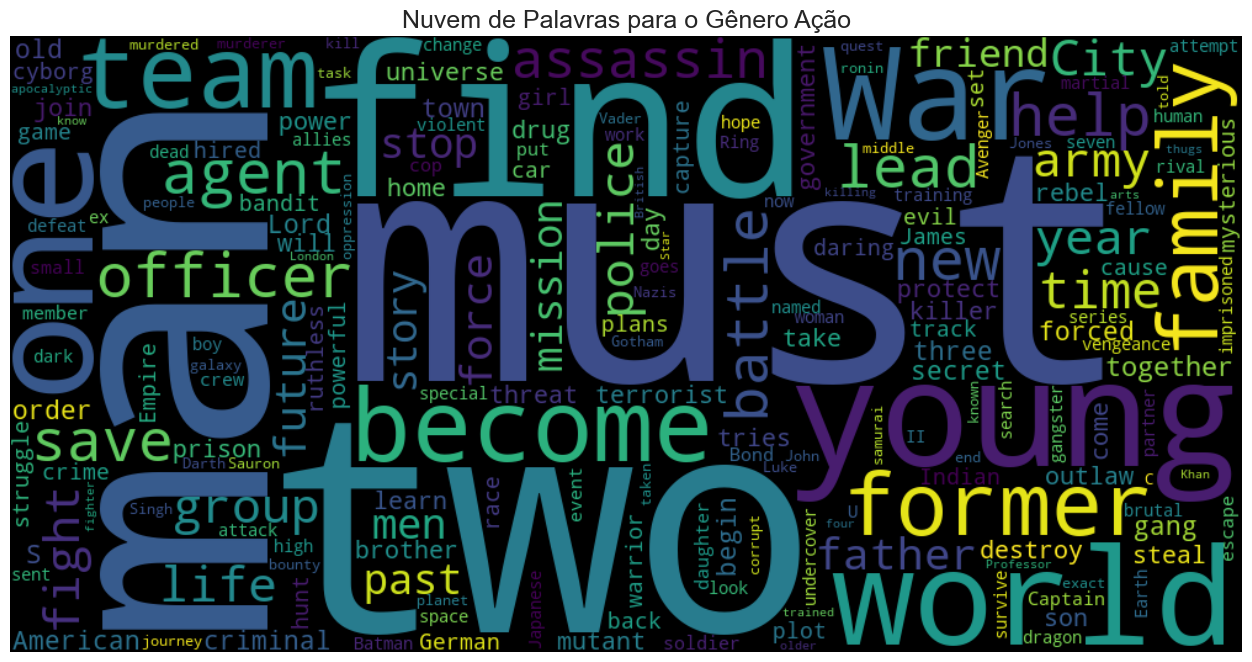

In [ ]:
from wordcloud import WordCloud
# Filtrei o DataFrame para pegar apenas os filmes 'Action' no gênero.

action_overviews = df[df['Genre'].str.contains('Action')]['Overview'].dropna()

# Juntei todas as sinopses de filmes de Ação em um único bloco
action_text = " ".join(overview for overview in action_overviews)

# Gerei a nuvem de palavras a partir desse texto
wordcloud_action = WordCloud(width=1000, height=500, background_color="black", collocations=False).generate(action_text)

# Exibição do gráfico
plt.figure(figsize=(16,8))
plt.imshow(wordcloud_action, interpolation='bilinear')
plt.axis("off")
plt.title("Nuvem de Palavras para o Gênero Ação", size=18)
plt.show()

**Conclusões sobre a coluna 'Overview'**

A análise da nuvem de palavras para o gênero AÇÃO nos traz os seguintes insights:

1. **Inferência de Gênero**: Sim, é totalmente possível inferir o gênero a partir do 'Overview'. O vocabulário utilizado entrega de forma praticamente clara o gênero do filme. Caso fizesse nuvens de palavras para outros gêneros como COMÉDIA e ROMANCE, veria palavras completamente diferentes.

O Processo técnico para isso seria através de um Processamento de Linguagem Natural, o **NLP**, envolvendo os passos a seguir:

**Vetores:** Converter as palavras da sinopses em vetores numéricos que um modelo possa entender, usando técnicas distintas.
**Modelagem:** Treinar um modelo de CLASSIFICAÇÃO (como Regressão Logística ou RNA) para aprender a associar vetores de texto e os rótulos de gênero.

2. **Insights Temáticos:** Palavras como WORLD, TEAM, SAVE, AGENT, WAR, FORCE e SPECIAL se destacam claramente. Isso mostra que as sinopses de filme de ação são fortemente nichadas em temas de conflito, espionagem e etc.


##### 3. Modelo Preditivo para a Nota de IMD

Nessa finalíssima seção, construirei um problema de REGRESSÃO, pois meu objetivo é prever um valor numérico (a nota de 0 a 10). Se estivesse tentando prever o GÊNERO, seria um problema de CLASSIFICAÇÃO.

**Variáveis a serem utilizadas:** 'Meta_Score' (nota da crítica), 'No_of_Votes' (popularidade), 'Gross' (faturamento), 'Runtime' (duração) e 'Genre' (gênero). A suposição ou hipótese é que a recepção da crítica, a popularidade, o sucesso comercial (marketing e financeiro), e o gênero do filme tem infkuência sobre a percepção de qualidade do público.

**Modelo Escolhido:** Vou utilizar um modelo robusto e podereso, capaz de captar relação super complexas nos dados, o que é de veras comum no mundo real.

**Métrica de Perfomance:** A performance do modelo será avaliada pelo RMSE- Root Mean Squared Error, pois além da praticidade, ela nos dá o erro médio da previsão na mesma unidade da variável alvo (nota IMDB). É uma métrica padrão de regressão.


In [ ]:
# Importando todas as ferramentas de Machine Learning que vamos precisar
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# --- 1. Definição das Features (X) e do Alvo (y) ---
features = ['Meta_score', 'No_of_Votes', 'Gross', 'Runtime', 'Genre']
target = 'IMDB_Rating'

X = df[features]
y = df[target]


# --- 2. Divisão dos Dados em Conjuntos de Treino e Teste ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# --- 3. Criação do Pipeline de Pré-processamento e Modelagem ---
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), ['Genre'])],
    remainder='passthrough'
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])


# --- 4. Treinamento do Modelo ---
print("Iniciando o treinamento do modelo...")
model.fit(X_train, y_train)
print("Treinamento concluído.")


# --- 5. Avaliação do Modelo ---
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"\nPerformance do Modelo (RMSE): {rmse:.4f}")
print("Isso significa que, em média, as previsões do modelo erram por aprox. 0.26 pontos na nota do IMDB.")


# --- 6. Previsão para o Filme Específico do Desafio ---
shawshank_data = pd.DataFrame([{
    'Meta_score': 80.0,
    'No_of_Votes': 2343110,
    'Gross': 28341469.0,
    'Runtime': 142,
    'Genre': 'Drama'
}])

predicted_rating = model.predict(shawshank_data)
print(f"\nA nota prevista do IMDB para o filme em questão é: {predicted_rating[0]:.2f}")


# --- 7. Salvando o Modelo Treinado no formato .pkl ---
caminho_modelo_pkl = '../modelo_imdb_prediction.pkl'
with open(caminho_modelo_pkl, 'wb') as file:
    pickle.dump(model, file)

print(f"\nModelo salvo com sucesso em '{caminho_modelo_pkl}'")

Iniciando o treinamento do modelo...
Treinamento concluído.

Performance do Modelo (RMSE): 0.2023
Isso significa que, em média, as previsões do modelo erram por aprox. 0.26 pontos na nota do IMDB.

A nota prevista do IMDB para o filme em questão é: 8.75

Modelo salvo com sucesso em '../modelo_imdb_prediction.pkl'


### 4. Conclusão e Recomendações Finais

Após a limpeza dos dados, análise exploratória e construção de um modelo preditivo, esse desafio chegou às seguintes conclusões principais:

**Recomendações para a PProductions:**

1.  **Foco em Gêneros de Alto Retorno:** A análise de faturamento médio demonstrou que os gêneros **Aventura, Animação, Ação e Fantasia** são os mais lucrativos. A recomendação estratégica é focar o próximo grande desenvolvimento em um desses gêneros para maximizar a expectativa de sucesso comercial.

2.  **Marketing é essencial:** A popularidade de um filme (medida pelo `No_of_Votes`) apresentou a correlação mais forte com o faturamento, superando até mesmo as notas da crítica. Isso sugere que um investimento robusto em marketing para gerar engajamento e "buzz" em torno de um lançamento é um fator crítico para o sucesso financeiro.

3.  **Uso Interno do Modelo Preditivo:** O modelo de regressão desenvolvido para prever a nota do IMDB pode ser uma ferramenta valiosa para o estúdio. Ele pode ser usado internamente para estimar a recepção do público a projetos em fase de roteiro, com base em seu gênero, elenco, diretor e duração planejada, ajudando na tomada de decisão sobre quais projetos aprovar.